# Exploring Neuropixels Recordings from Hippocampus During Odor Presentation

> **Note:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Introduction

This notebook explores Dandiset 001335: "Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation". The dataset contains neural recordings from the hippocampus of head-fixed mice as they were presented with various odor sequences. The neural activity was recorded using Neuropixels probes.

### Dataset Overview

- **Name**: Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation
- **Description**: Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.
- **Contributors**: Mohapatra, Manish and Halchenko, Yaroslav
- **Institution**: Dartmouth College
- **Lab**: vandermeerlab
- **Keywords**: ecephys, neuropixels, odor-sequences, hippocampus

## Required Packages

To run this notebook, you'll need the following packages installed:

- `pynwb` - For working with Neurodata Without Borders (NWB) files
- `lindi` - For accessing the NWB file remotely
- `numpy` - For numerical operations
- `pandas` - For data manipulation
- `matplotlib` - For visualizations
- `seaborn` - For enhanced visualizations
- `dandi` - For accessing the DANDI Archive

In [1]:
# Import required packages
import pynwb
import lindi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

# Set up visualization
sns.set_theme()
plt.rcParams['figure.figsize'] = [12, 8]

## Connecting to the DANDI Archive and Exploring the Dandiset

First, let's use the DANDI API to get information about the Dandiset and list its assets.

In [2]:
# Connect to the DANDI API and get the Dandiset information
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

# Get metadata and display information
metadata = dandiset.get_metadata()
print(f"Dandiset ID: {dandiset.identifier}")
print(f"Dandiset Version: {dandiset.version}")
print(f"Number of assets: {len(assets)}")
print("\nAssets:")
for asset in assets:
    print(f"- {asset.path}")
    print(f"  ID: {asset.identifier}")
    print(f"  Size: {asset.size / 1e6:.2f} MB")

Dandiset ID: 001335
Dandiset Version: draft
Number of assets: 1

Assets:
- sub-M541/sub-M541_ecephys.nwb
  ID: aca66db7-4c02-4453-8dcb-a179d44b1c5d
  Size: 1374.26 MB


## Loading the NWB File

The dataset contains a single NWB file with electrophysiology data. We'll load the file using the `lindi` and `pynwb` libraries.

> Note: The file is loaded remotely without downloading the entire file to your local machine.

In [3]:
# Load the NWB file
print("Loading NWB file...")
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001335/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
print("NWB file loaded successfully!")

Loading NWB file...


/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully!


## Exploring Basic Metadata

Let's begin by examining the basic metadata of the experiment.

In [4]:
# Extract basic metadata
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")
print(f"Experimenter: {nwb.experimenter}")

# Subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Session Description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Identifier: M541-2024-08-31
Session Start Time: 2025-02-14 10:53:25.647928-05:00
Experiment Description: Head-fixed mouse presented with odor sequences
Institution: Dartmouth College
Lab: vandermeerlab
Experimenter: ('Mohapatra, Manish',)

Subject Information:
Subject ID: M541
Species: Mus musculus
Sex: M
Age: P8W/
Description: Headbarr-ed mouse with craniotomies over dCA1


## Experimental Design

From the session description, we can see that the experiment consisted of three blocks with different odor presentations:

- **Block 1**: UE (Odors A, B, C)
- **Block 2**: SE (Odors D, E, F)
- **Block 3**: Localizer

Let's examine the timing of these blocks and the odor presentations.

In [5]:
# Examine block intervals
print("Experimental Blocks:")
for block_name in ["Block 1", "Block 2", "Block 3"]:
    block = nwb.intervals[block_name]
    start = block["start_time"].data[:]
    stop = block["stop_time"].data[:]
    duration = stop - start
    print(f"{block_name}: Start={start[0]:.2f}s, Stop={stop[0]:.2f}s, Duration={duration[0]:.2f}s")

# Examine odor presentation intervals
print("\nOdor Presentations:")
odor_counts = {}
for odor_name in ["Odor A ON", "Odor B ON", "Odor C ON", "Odor D ON", "Odor E ON", "Odor F ON"]:
    odor_interval = nwb.intervals[odor_name]
    starts = odor_interval["start_time"].data[:]
    stops = odor_interval["stop_time"].data[:]
    durations = stops - starts
    avg_duration = np.mean(durations)
    odor_counts[odor_name] = len(starts)
    print(f"{odor_name}: {len(starts)} presentations, Avg Duration={avg_duration:.2f}s")

Experimental Blocks:
Block 1: Start=616.00s, Stop=2144.00s, Duration=1528.00s
Block 2: Start=2712.00s, Stop=4243.00s, Duration=1531.00s
Block 3: Start=4859.00s, Stop=6182.00s, Duration=1323.00s

Odor Presentations:
Odor A ON: 101 presentations, Avg Duration=2.00s
Odor B ON: 101 presentations, Avg Duration=2.00s
Odor C ON: 101 presentations, Avg Duration=2.00s
Odor D ON: 101 presentations, Avg Duration=2.00s
Odor E ON: 101 presentations, Avg Duration=2.00s
Odor F ON: 101 presentations, Avg Duration=2.00s


Let's visualize the number of presentations for each odor to better understand the experimental design.

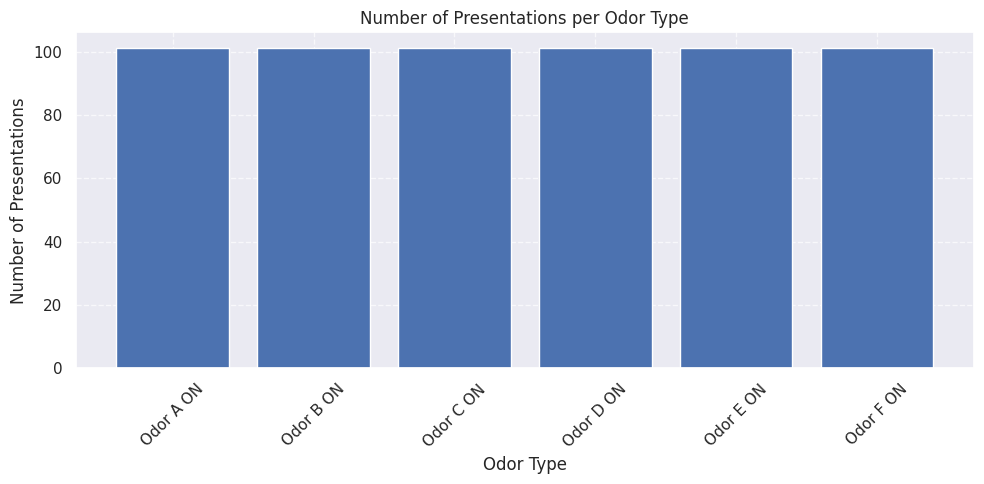

In [6]:
# Create a bar plot for odor presentation counts
plt.figure(figsize=(10, 5))
plt.bar(odor_counts.keys(), odor_counts.values())
plt.xlabel('Odor Type')
plt.ylabel('Number of Presentations')
plt.title('Number of Presentations per Odor Type')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now, let's analyze how the odor presentations are distributed across the experimental blocks.

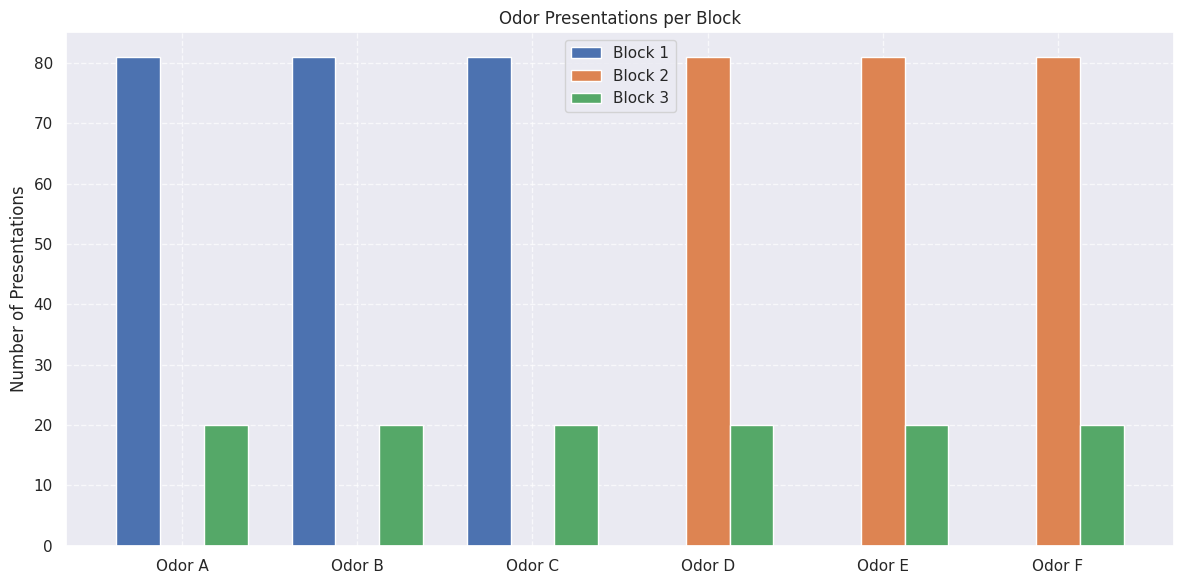

In [7]:
# Function to determine which block an odor presentation belongs to
def get_block_for_time(time):
    blocks = {}
    for block_name in ["Block 1", "Block 2", "Block 3"]:
        block = nwb.intervals[block_name]
        start = block["start_time"].data[:][0]
        stop = block["stop_time"].data[:][0]
        blocks[block_name] = {"start": start, "stop": stop}
    
    for block_name, block_info in blocks.items():
        if block_info["start"] <= time < block_info["stop"]:
            return block_name
    return "None"  # If the time doesn't fall within any block

# Count odor presentations per block
odor_per_block = {}
for odor_name in ["Odor A ON", "Odor B ON", "Odor C ON", "Odor D ON", "Odor E ON", "Odor F ON"]:
    if odor_name not in odor_per_block:
        odor_per_block[odor_name] = {"Block 1": 0, "Block 2": 0, "Block 3": 0, "None": 0}
    
    odor_interval = nwb.intervals[odor_name]
    starts = odor_interval["start_time"].data[:]
    
    for start_time in starts:
        block = get_block_for_time(start_time)
        odor_per_block[odor_name][block] += 1

# Plot odor presentations per block
odors = list(odor_per_block.keys())
block_names = ["Block 1", "Block 2", "Block 3"]
x = np.arange(len(odors))
width = 0.25

plt.figure(figsize=(12, 6))
for i, block in enumerate(block_names):
    counts = [odor_per_block[odor][block] for odor in odors]
    plt.bar(x + (i - 1) * width, counts, width, label=block)

plt.ylabel('Number of Presentations')
plt.title('Odor Presentations per Block')
plt.xticks(x, [odor.replace(" ON", "") for odor in odors])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The plot reveals the experimental design:

- **Block 1** primarily features Odors A, B, and C
- **Block 2** primarily features Odors D, E, and F
- **Block 3** has fewer presentations of all odors

This confirms the session description: Block 1 with odors ABC, Block 2 with odors DEF, and Block 3 acting as a "Localizer" with fewer presentations of all odors.

## Exploring the Neural Recording Data

The dataset contains two main types of neural data:

1. **Local Field Potential (LFP)** - Continuous recordings from the electrodes
2. **Units (Neurons)** - Spike times from sorted neurons

Let's explore both types of data.

### Local Field Potential (LFP) Data

First, let's examine the LFP data structure.

In [8]:
# Examine LFP data
lfp = nwb.processing["ecephys"]["LFP"]
print(f"LFP Shape: {lfp.data.shape}")
print(f"Sampling Rate: {lfp.rate} Hz")
print(f"Duration: {lfp.data.shape[0]/lfp.rate:.2f} seconds ({(lfp.data.shape[0]/lfp.rate)/60:.2f} minutes)")
print(f"Number of Electrodes: {lfp.data.shape[1]}")

# Get electrode information
electrodes = nwb.electrodes
print("\nElectrode Information:")
print(f"Number of Electrodes: {len(electrodes['id'].data[:])}")
print(f"Columns: {electrodes.colnames}")

# Create a dataframe with electrode information
electrode_ids = electrodes["id"].data[:]
locations = electrodes["location"].data[:]
depths = electrodes["depth"].data[:]
hemispheres = electrodes["hemisphere"].data[:]
labels = electrodes["label"].data[:]

# Create a sample dataframe for the first 10 electrodes
electrode_df = pd.DataFrame({
    'id': electrode_ids[:10],
    'location': locations[:10],
    'depth': depths[:10],
    'hemisphere': hemispheres[:10],
    'label': labels[:10]
})
print("\nSample Electrode Data (first 10):")
print(electrode_df)

LFP Shape: (15475276, 64)
Sampling Rate: 2500.0 Hz
Duration: 6190.11 seconds (103.17 minutes)
Number of Electrodes: 64

Electrode Information:
Number of Electrodes: 64
Columns: ('location', 'group', 'group_name', 'label', 'depth', 'hemisphere')

Sample Electrode Data (first 10):
   id    location   depth hemisphere           label
0   0  brain area  2390.0      Right  imec0.ap#AP112
1   1  brain area  2285.0      Right  imec0.ap#AP126
2   2  brain area  2195.0      Right  imec0.ap#AP138
3   3  brain area  2090.0      Right  imec0.ap#AP200
4   4  brain area  1985.0      Right  imec0.ap#AP214
5   5  brain area  1895.0      Right  imec0.ap#AP226
6   6  brain area  1790.0      Right  imec0.ap#AP288
7   7  brain area  1685.0      Right  imec0.ap#AP302
8   8  brain area  2375.0      Right  imec0.ap#AP162
9   9  brain area  2270.0      Right  imec0.ap#AP176


Let's extract a small sample of LFP data and visualize it to get a sense of the signal.

Extracting LFP sample for visualization...


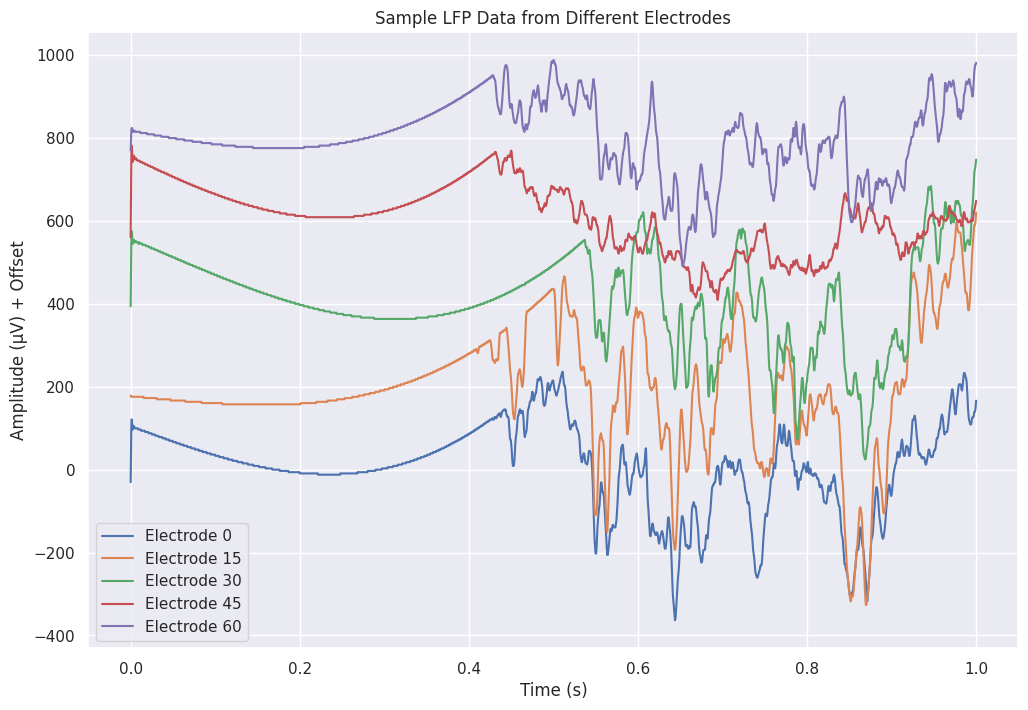

In [9]:
# Extract a small sample of LFP data for visualization
print("Extracting LFP sample for visualization...")
# Get 1 second of data from the beginning for 5 electrodes
sample_duration = 1.0  # seconds
sample_rate = lfp.rate
n_samples = int(sample_duration * sample_rate)
electrode_indices = [0, 15, 30, 45, 60]  # Select a few electrodes across the array

if len(electrode_indices) > lfp.data.shape[1]:
    electrode_indices = list(range(min(5, lfp.data.shape[1])))

lfp_sample = np.zeros((n_samples, len(electrode_indices)))
for i, e_idx in enumerate(electrode_indices):
    if e_idx < lfp.data.shape[1]:
        lfp_sample[:, i] = lfp.data[:n_samples, e_idx]

# Plot LFP sample
plt.figure(figsize=(12, 8))
time_vector = np.arange(n_samples) / sample_rate
for i, e_idx in enumerate(electrode_indices):
    if e_idx < lfp.data.shape[1]:
        plt.plot(time_vector, lfp_sample[:, i] + i*200, label=f'Electrode {e_idx}')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV) + Offset')
plt.title('Sample LFP Data from Different Electrodes')
plt.legend()
plt.grid(True)
plt.show()

### Units (Neurons) Data

Now, let's explore the units (neurons) data.

In [10]:
# Examine units (neurons)
units = nwb.units
print(f"Number of Units: {len(units['id'].data[:])}")
print(f"Columns: {units.colnames}")

# Get information for units
unit_ids = units["id"].data[:]
depths = units["depth"].data[:]
hemispheres = units["hemisphere"].data[:]
global_ids = units["global_id"].data[:]

# Count spikes for the first 10 units
print("\nSpike counts for first 10 units:")
for i in range(10):
    if i < len(unit_ids):
        spike_times = units["spike_times"][i]
        print(f"Unit {global_ids[i]}: {len(spike_times)} spikes")

# Calculate spike counts for all units
all_spike_counts = []
for i in range(len(unit_ids)):
    spike_times = units["spike_times"][i]
    all_spike_counts.append(len(spike_times))

Number of Units: 283
Columns: ('depth', 'hemisphere', 'global_id', 'spike_times', 'electrode_group', 'waveform_mean')

Spike counts for first 10 units:


Unit imec0.shank2.0  : 4742 spikes


Unit imec0.shank2.3  : 9670 spikes


Unit imec0.shank2.4  : 24514 spikes


Unit imec0.shank2.5  : 208 spikes


Unit imec0.shank2.6  : 42430 spikes


Unit imec0.shank2.8  : 68170 spikes


Unit imec0.shank3.23 : 8982 spikes


Unit imec0.shank3.40 : 65839 spikes


Unit imec0.shank1.53 : 97149 spikes


Unit imec0.shank0.54 : 19380 spikes


Let's visualize the distribution of spike counts across all neurons to understand the variability in neural activity.

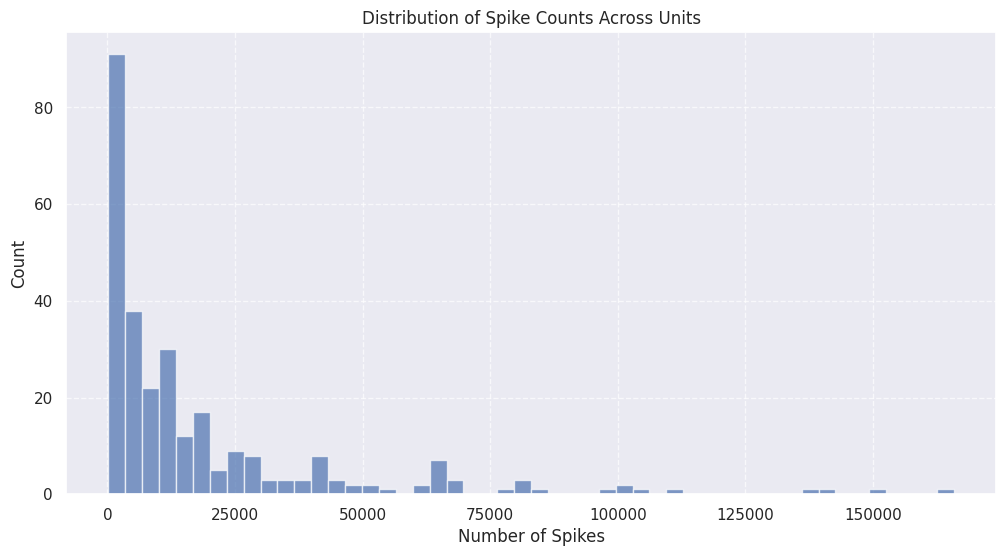

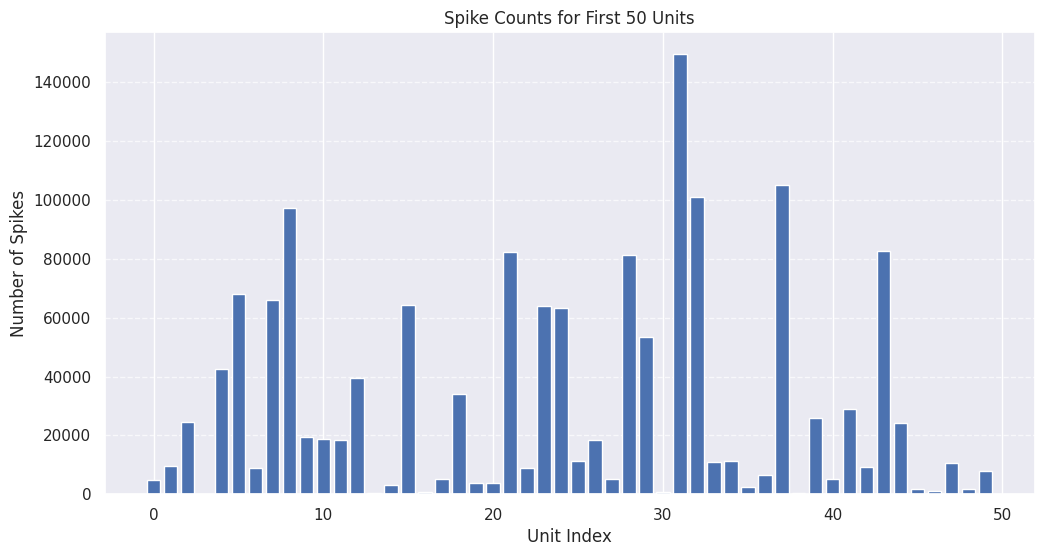

In [11]:
# Plot histogram of spike counts
plt.figure(figsize=(12, 6))
plt.hist(all_spike_counts, bins=50, alpha=0.7)
plt.xlabel('Number of Spikes')
plt.ylabel('Count')
plt.title('Distribution of Spike Counts Across Units')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot spike counts for first 50 units
plt.figure(figsize=(12, 6))
plt.bar(range(min(50, len(all_spike_counts))), all_spike_counts[:50])
plt.xlabel('Unit Index')
plt.ylabel('Number of Spikes')
plt.title('Spike Counts for First 50 Units')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analyzing Neural Responses to Odors

Now, let's examine how the neural activity relates to the odor presentations. We'll focus on:

1. LFP responses to different odors
2. Single neuron responses to odors

### LFP Responses to Odors

First, let's analyze the LFP responses to different odors in Block 1.

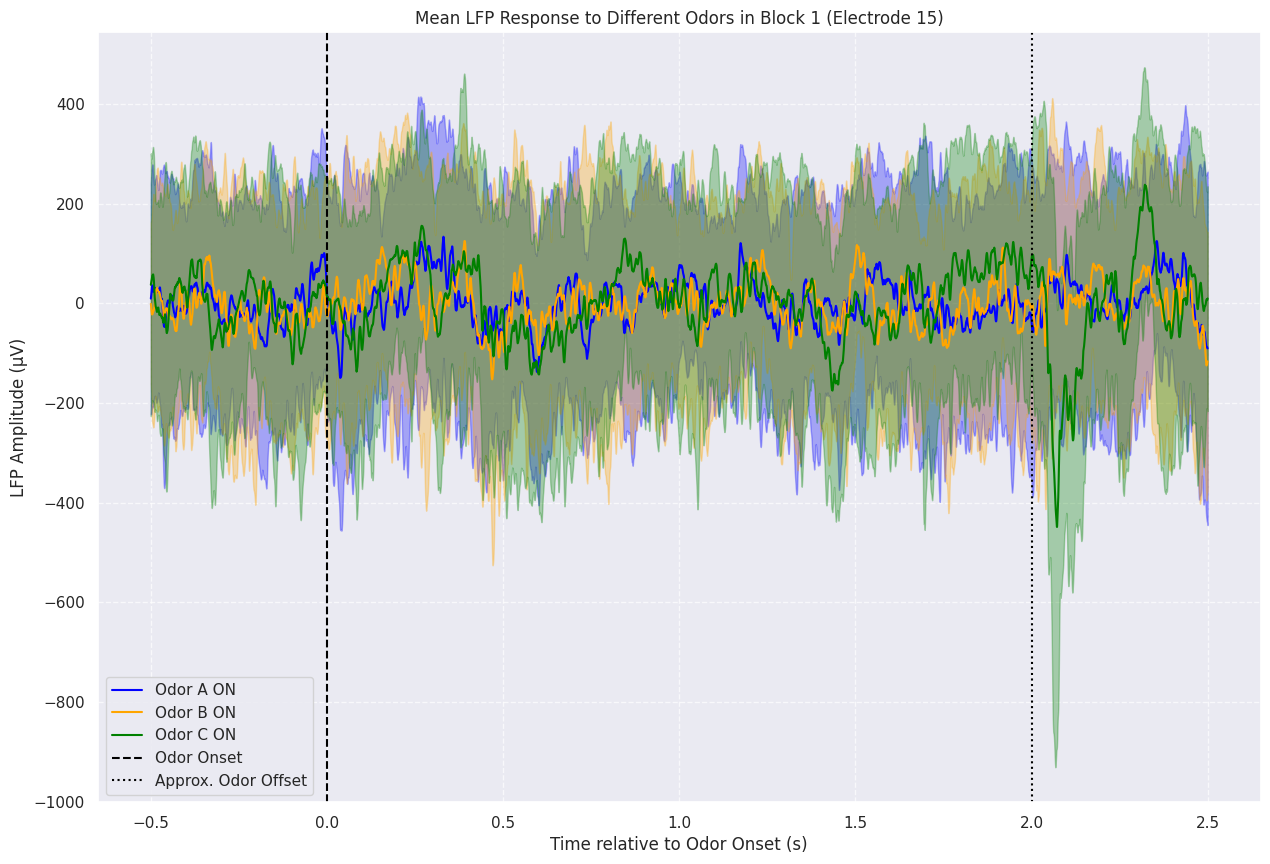

In [12]:
# Function to extract LFP around an event
def get_lfp_around_event(event_time, before=0.5, after=2.5, electrode_idx=0):
    """
    Extract LFP data around an event.
    
    Parameters:
    - event_time: Time of the event in seconds
    - before: Time before event in seconds
    - after: Time after event in seconds
    - electrode_idx: Index of the electrode
    
    Returns:
    - times: Time array centered around the event
    - lfp_snippet: LFP data around the event
    """
    # Calculate sample indices
    start_idx = max(0, int((event_time - before) * lfp.rate))
    end_idx = min(lfp.data.shape[0], int((event_time + after) * lfp.rate))
    
    # Extract LFP data
    lfp_snippet = lfp.data[start_idx:end_idx, electrode_idx]
    times = np.arange(len(lfp_snippet)) / lfp.rate - before
    
    return times, lfp_snippet

# Analyze LFP responses to different odors in Block 1
# Select one electrode for this analysis
electrode_idx = 15

# For each odor, get average LFP response in Block 1
plt.figure(figsize=(15, 10))
odor_names = ["Odor A ON", "Odor B ON", "Odor C ON"]
colors = ['blue', 'orange', 'green']

for i, odor_name in enumerate(odor_names):
    # Get odor presentations in Block 1
    starts = nwb.intervals[odor_name]["start_time"].data[:]
    block1_starts = [t for t in starts if get_block_for_time(t) == "Block 1"]
    
    if len(block1_starts) > 0:
        # Limit to first 30 presentations for efficiency
        block1_starts = block1_starts[:30]
        
        # Get LFP data for each presentation
        all_lfp_data = []
        for start_time in block1_starts:
            times, lfp_data = get_lfp_around_event(start_time, before=0.5, after=2.5, electrode_idx=electrode_idx)
            all_lfp_data.append(lfp_data)
        
        # Calculate mean and std
        if all_lfp_data:
            all_lfp_data = np.vstack(all_lfp_data)
            mean_lfp = np.mean(all_lfp_data, axis=0)
            std_lfp = np.std(all_lfp_data, axis=0)
            
            # Plot mean and std
            plt.plot(times, mean_lfp, color=colors[i], label=f"{odor_name}")
            plt.fill_between(times, mean_lfp - std_lfp, mean_lfp + std_lfp, color=colors[i], alpha=0.3)

plt.axvline(x=0, color='black', linestyle='--', label='Odor Onset')
plt.axvline(x=2, color='black', linestyle=':', label='Approx. Odor Offset')
plt.xlabel('Time relative to Odor Onset (s)')
plt.ylabel('LFP Amplitude (µV)')
plt.title(f'Mean LFP Response to Different Odors in Block 1 (Electrode {electrode_idx})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Single Neuron Responses to Odors

Now, let's analyze how individual neurons (units) respond to the odors.

First, let's select a few units with high spike counts for analysis.

In [13]:
# Find indices of top 5 units by spike count
top_unit_indices = np.argsort(all_spike_counts)[-5:]
print(f"Selected unit indices for spike analysis: {top_unit_indices}")
print("These correspond to the following global IDs:")
for idx in top_unit_indices:
    print(f"Unit {idx}: {global_ids[idx]} - {all_spike_counts[idx]} spikes")

Selected unit indices for spike analysis: [ 85 274  84  31 137]
These correspond to the following global IDs:
Unit 85: imec0.shank1.355 - 112529 spikes
Unit 274: imec1.shank0.553 - 137017 spikes
Unit 84: imec0.shank1.354 - 139975 spikes
Unit 31: imec0.shank2.139 - 149496 spikes
Unit 137: imec1.shank1.80  - 165824 spikes


Now, let's analyze the firing rate of these units in response to different odors:

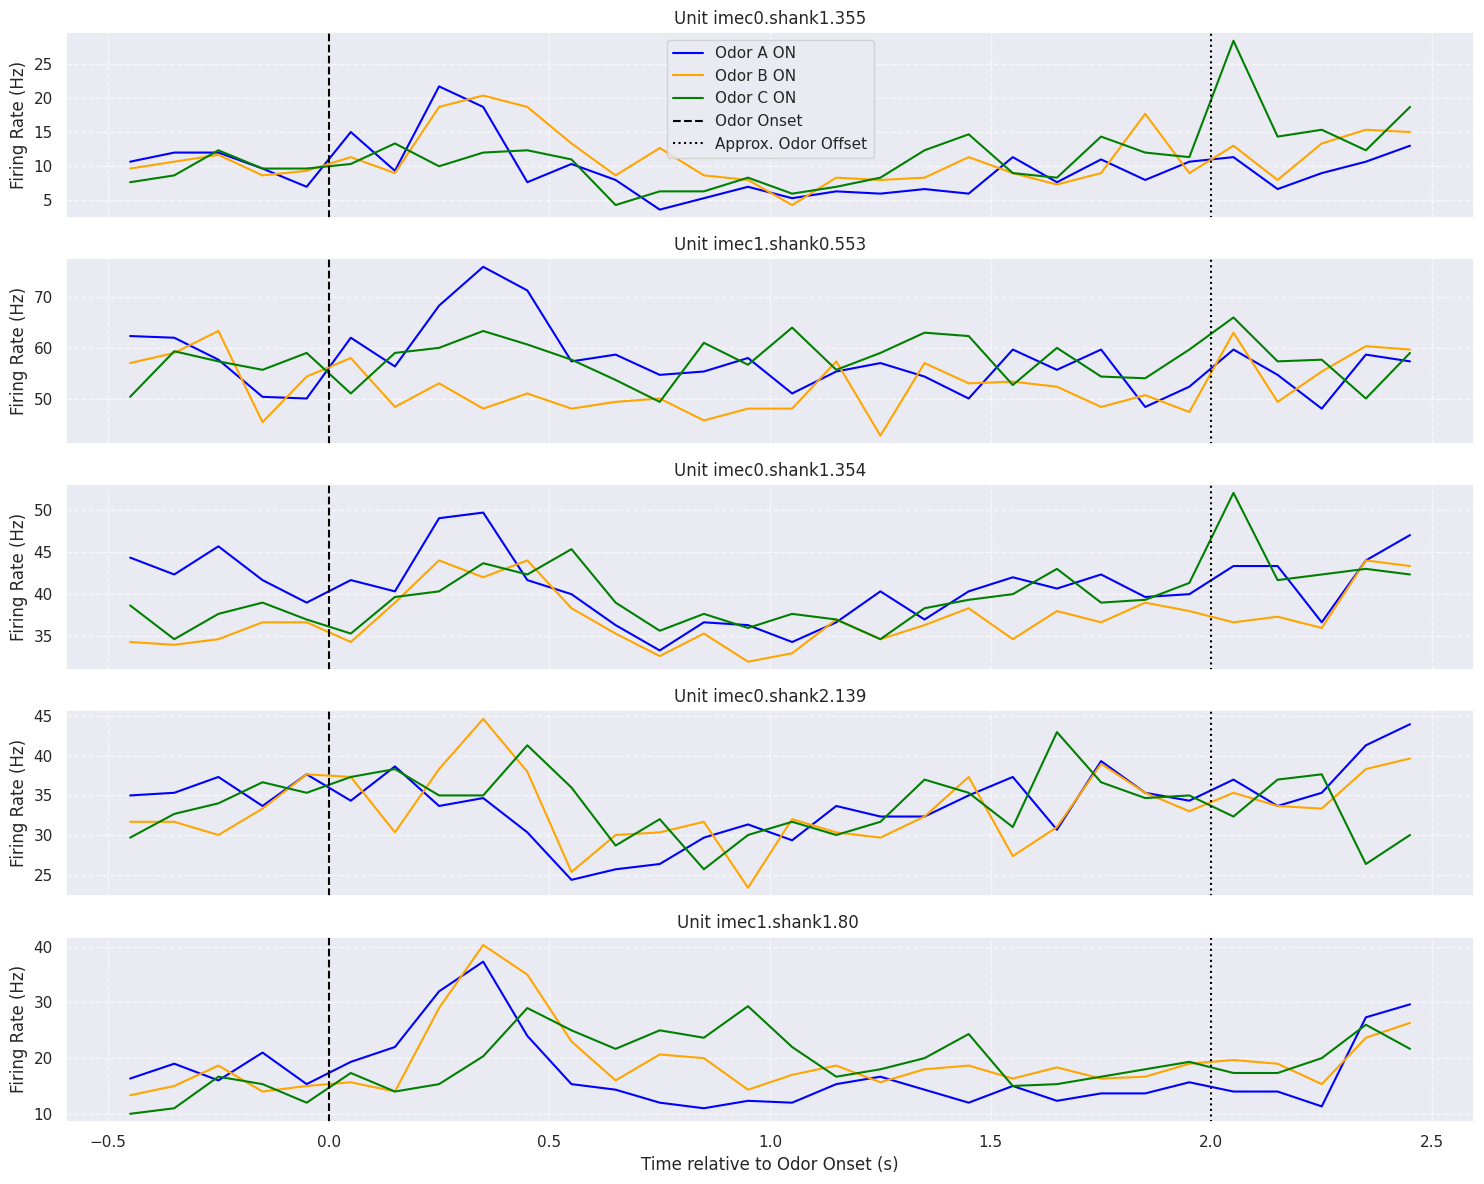

In [14]:
# Function to calculate firing rate around events
def calc_firing_rate(spike_times, event_times, before=0.5, after=2.5, bin_size=0.1):
    """
    Calculate firing rate around events.
    
    Parameters:
    - spike_times: Array of spike times
    - event_times: Array of event times
    - before: Time before event in seconds
    - after: Time after event in seconds
    - bin_size: Size of time bins in seconds
    
    Returns:
    - bin_centers: Centers of time bins
    - rate: Firing rate in each bin (Hz)
    """
    bins = np.arange(-before, after + bin_size, bin_size)
    bin_centers = bins[:-1] + bin_size / 2
    count = np.zeros_like(bin_centers)
    
    for event_time in event_times:
        # Align spike times to event
        aligned_spikes = spike_times - event_time
        # Count spikes in each bin
        hist, _ = np.histogram(aligned_spikes, bins=bins)
        count += hist
    
    # Convert count to rate (Hz)
    rate = count / (len(event_times) * bin_size)
    return bin_centers, rate

# Analyze firing rate for each odor in Block 1
fig, axes = plt.subplots(len(top_unit_indices), 1, figsize=(15, 12), sharex=True)

odor_names = ["Odor A ON", "Odor B ON", "Odor C ON"]
colors = ['blue', 'orange', 'green']

for i, unit_idx in enumerate(top_unit_indices):
    ax = axes[i]
    
    unit_id = global_ids[unit_idx]
    spike_times = units["spike_times"][unit_idx]
    
    for j, odor_name in enumerate(odor_names):
        # Get odor presentations in Block 1
        starts = nwb.intervals[odor_name]["start_time"].data[:]
        block1_starts = [t for t in starts if get_block_for_time(t) == "Block 1"]
        
        if len(block1_starts) > 0:
            # Limit to first 30 presentations for efficiency
            block1_starts = block1_starts[:30]
            
            # Calculate firing rate
            bin_centers, rate = calc_firing_rate(spike_times, block1_starts, before=0.5, after=2.5, bin_size=0.1)
            ax.plot(bin_centers, rate, color=colors[j], label=f"{odor_name}" if i == 0 else "")
    
    ax.axvline(x=0, color='black', linestyle='--', label='Odor Onset' if i == 0 else "")
    ax.axvline(x=2, color='black', linestyle=':', label='Approx. Odor Offset' if i == 0 else "")
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title(f'Unit {unit_id}')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if i == len(top_unit_indices) - 1:
        ax.set_xlabel('Time relative to Odor Onset (s)')
    
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()

### Spike Raster Plot

Let's create a raster plot to visualize the precise timing of spikes for an individual neuron in response to different odors.

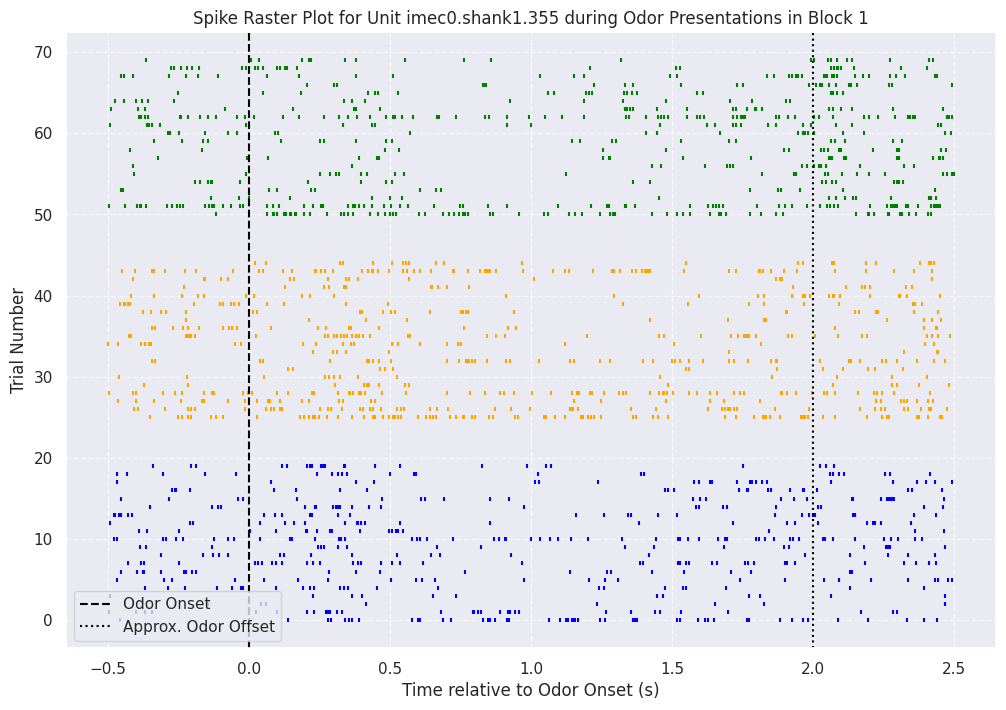

In [15]:
# Create a raster plot for one unit around odor onset
selected_unit_idx = top_unit_indices[0]  # Use the first unit with highest spike count
unit_id = global_ids[selected_unit_idx]
spike_times = units["spike_times"][selected_unit_idx]

plt.figure(figsize=(12, 8))

# Plot raster for Odor A, B, and C in Block 1
for i, odor_name in enumerate(["Odor A ON", "Odor B ON", "Odor C ON"]):
    # Get odor presentations in Block 1
    starts = nwb.intervals[odor_name]["start_time"].data[:]
    block1_starts = [t for t in starts if get_block_for_time(t) == "Block 1"]
    
    if len(block1_starts) > 0:
        # Limit to first 20 presentations for clarity
        block1_starts = block1_starts[:20]
        
        # For each presentation, plot spikes
        for j, start_time in enumerate(block1_starts):
            # Find spikes around this presentation
            mask = (spike_times >= start_time - 0.5) & (spike_times <= start_time + 2.5)
            presentation_spikes = spike_times[mask]
            
            # Align to odor onset
            aligned_spikes = presentation_spikes - start_time
            
            # Plot raster - create array of same y value for each spike
            y_values = np.ones_like(aligned_spikes) * (j + i * 25)
            plt.scatter(aligned_spikes, y_values, s=5, c=colors[i], marker='|')

# Add vertical lines for odor onset and offset
plt.axvline(x=0, color='black', linestyle='--', label='Odor Onset')
plt.axvline(x=2, color='black', linestyle=':', label='Approx. Odor Offset')

plt.xlabel('Time relative to Odor Onset (s)')
plt.ylabel('Trial Number')
plt.title(f'Spike Raster Plot for Unit {unit_id} during Odor Presentations in Block 1')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Advanced Analysis: Comparing Neural Responses Across Blocks

Finally, let's compare how neurons respond to odors across different experimental blocks.

Specifically, we'll focus on one neuron and compare its response to Odors A, B, and C in Block 1 vs Block 3.

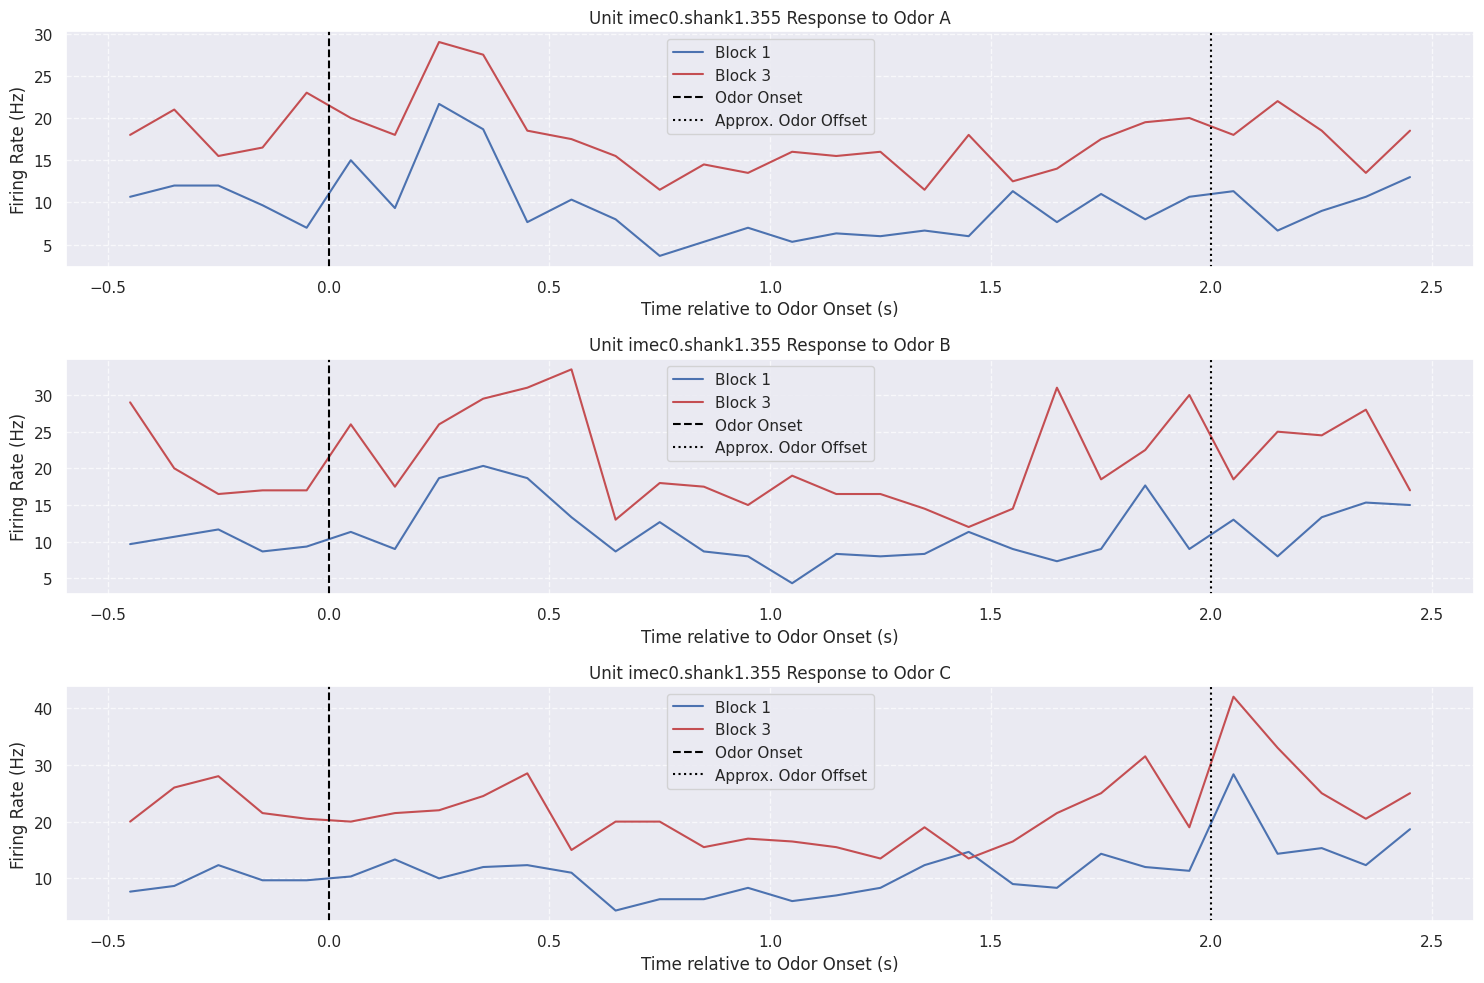

In [16]:
# Select one unit with high spike count
selected_unit_idx = top_unit_indices[0]
unit_id = global_ids[selected_unit_idx]
spike_times = units["spike_times"][selected_unit_idx]

# Compare firing rate for Odor A across blocks
plt.figure(figsize=(15, 10))

for odor_name in ["Odor A ON", "Odor B ON", "Odor C ON"]:
    # Get odor presentations in Block 1 and Block 3
    starts = nwb.intervals[odor_name]["start_time"].data[:]
    block1_starts = [t for t in starts if get_block_for_time(t) == "Block 1"]
    block3_starts = [t for t in starts if get_block_for_time(t) == "Block 3"]
    
    # Limit to first 30 presentations for efficiency
    block1_starts = block1_starts[:30] if block1_starts else []
    block3_starts = block3_starts[:30] if block3_starts else []
    
    if block1_starts and block3_starts:
        # Calculate firing rates
        bin_centers1, rate1 = calc_firing_rate(spike_times, block1_starts, before=0.5, after=2.5, bin_size=0.1)
        bin_centers3, rate3 = calc_firing_rate(spike_times, block3_starts, before=0.5, after=2.5, bin_size=0.1)
        
        # Plot firing rates
        plt.subplot(3, 1, ["Odor A ON", "Odor B ON", "Odor C ON"].index(odor_name) + 1)
        plt.plot(bin_centers1, rate1, 'b-', label='Block 1')
        plt.plot(bin_centers3, rate3, 'r-', label='Block 3')
        plt.axvline(x=0, color='black', linestyle='--', label='Odor Onset')
        plt.axvline(x=2, color='black', linestyle=':', label='Approx. Odor Offset')
        plt.xlabel('Time relative to Odor Onset (s)')
        plt.ylabel('Firing Rate (Hz)')
        plt.title(f'Unit {unit_id} Response to {odor_name.replace(" ON", "")}')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Summary

In this notebook, we've explored Dandiset 001335, which contains Neuropixels recordings from the hippocampus of head-fixed mice during the presentation of different odor sequences.

We've learned that:

1. The dataset contains a single NWB file with recordings from one experimental session with mouse M541.

2. The experiment was organized into three blocks:
   - Block 1 primarily featured odors A, B, and C
   - Block 2 primarily featured odors D, E, and F
   - Block 3 had fewer presentations of all odors and served as a "Localizer"

3. The dataset includes:
   - LFP (Local Field Potential) data from 64 electrodes
   - Spike data from 283 units (neurons)

4. We've visualized and analyzed:
   - The basic structure of LFP signals
   - The distribution of neural activity across units
   - Neural responses (both LFP and spikes) to different odors
   - How responses to the same odors compare across experimental blocks

This dataset provides valuable insights into how hippocampal neurons encode information about different odors, which can help us understand the neural basis of olfactory processing and memory.

## Next Steps

Here are some potential next steps for further analysis of this dataset:

1. **Decode Odor Identity**: Use machine learning techniques to decode which odor was presented based on the neural activity patterns.

2. **Population Analysis**: Examine how the entire population of neurons collectively represents different odors.

3. **Compare Representations Across Blocks**: Investigate how representations of the same odors change from Block 1 to Block 3.

4. **Temporal Dynamics**: Analyze how the neural representation of odors evolves over time during and after odor presentation.

5. **Cross-Odor Analysis**: Investigate similarities and differences in neural responses to different odors.

6. **Spectral Analysis**: Perform frequency analysis on the LFP data to identify oscillations related to odor processing.